## Detection of Highly Variable Genes (HVG)


This script identifies the top 1,000 highly variable genes (HVGs) from the input dataset. These HVGs serve as the transcriptomic input features for multimodal learning experiments.

In [1]:
import scanpy as sc
import pandas as pd
import os

### Setting Up the Paths

In [2]:

experiment_folder = '../../data/breast_test'
count_file = 'CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.h5'

print(f'Loading data from {experiment_folder}/{count_file}')
#check if file exists
if not os.path.exists(f'{experiment_folder}/{count_file}'):
    raise FileNotFoundError(f'File {experiment_folder}/{count_file} does not exist.')

Loading data from ../../data/breast_test/CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.h5


## Preprocessing

In [ ]:
adata = sc.read_visium(experiment_folder, count_file=count_file, load_images=True)
adata.var_names_make_unique()

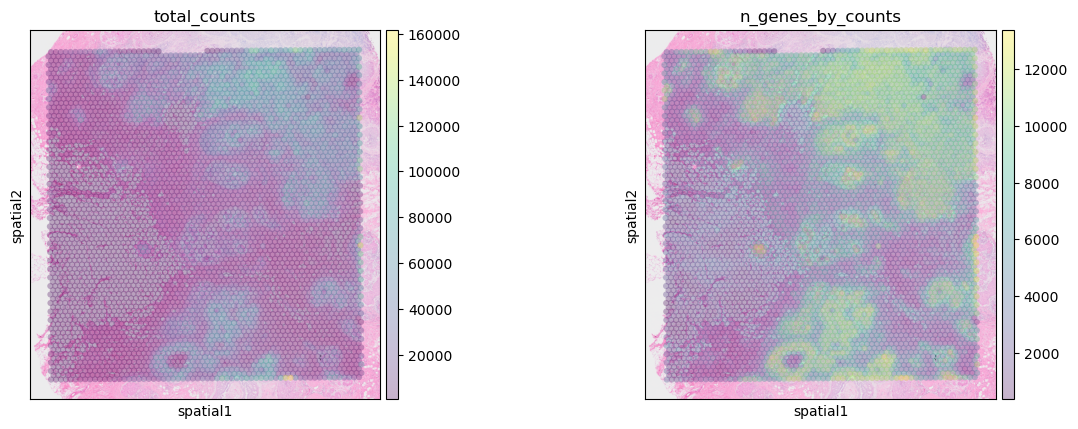

In [4]:
# save the raw data
adata.raw = adata
sc.pp.calculate_qc_metrics(adata, inplace=True)
# filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
# Visualization of QC metrics
sc.pl.spatial(adata, img_key="hires", color=["total_counts","n_genes_by_counts"], size=1.8, cmap='viridis', alpha=0.3)


### HVG detection

In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [6]:
# test with highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=1000)
sc.pp.pca(adata, mask_var='highly_variable')


In [9]:
# save adata into experiment folder - adata_highly_variable
adata.write(experiment_folder + '/adata_1k_highly_variable.h5ad')
print(f'Saved highly variable genes to {experiment_folder}/adata_1k_highly_variable.h5ad')

Saved highly variable genes data to ../../data/breast_test/adata_1k_highly_variable.h5ad
